# Titanic - Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# Objective

* To explore the Titanic dataset and understand patterns in passenger data.
* To analyze how factors like age, gender, class, and fare affected passenger survival.
* To visualize relationships between features and survival using Python libraries like Pandas, Matplotlib, Seaborn, and Plotly.
* To gain insights that show how demographics and socio-economic status influenced survival chances.

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
df = titanic

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.shape

(891, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

df.isnull().sum()

In [8]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

#  Survival Distrubution

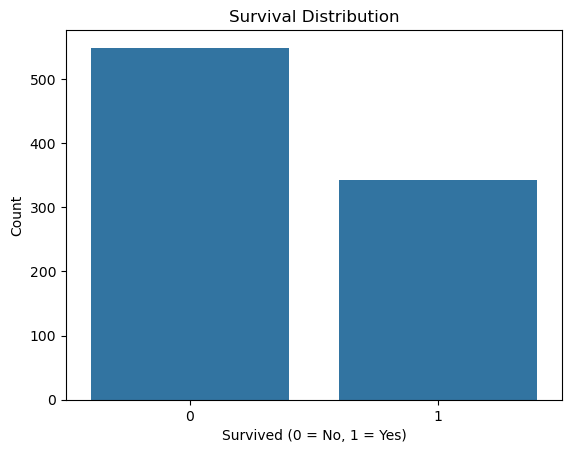

In [9]:
sns.countplot(data=df, x='survived')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


# Insights
* The countplot shows the number of passengers who **did not survive (0)** versus those who **survived (1)**.
* It helps quickly compare survival distribution and see which group is larger.


In [10]:
survival_rate = df['survived'].mean() * 100
survival_rate


np.float64(38.38383838383838)

# Gender Distribution

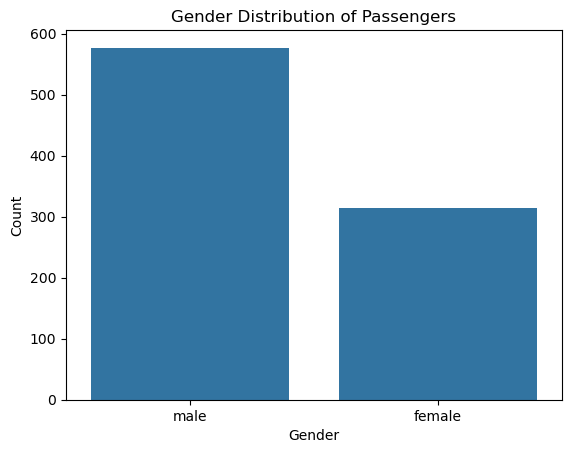

sex
male      577
female    314
Name: count, dtype: int64

In [11]:
sns.countplot(data=df, x='sex')
plt.title('Gender Distribution of Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

df['sex'].value_counts()

# Insights
* The plot and value counts show the distribution of passengers by gender.
* It is clear which gender has a higher number of passengers in the dataset.


# Age Distribution 

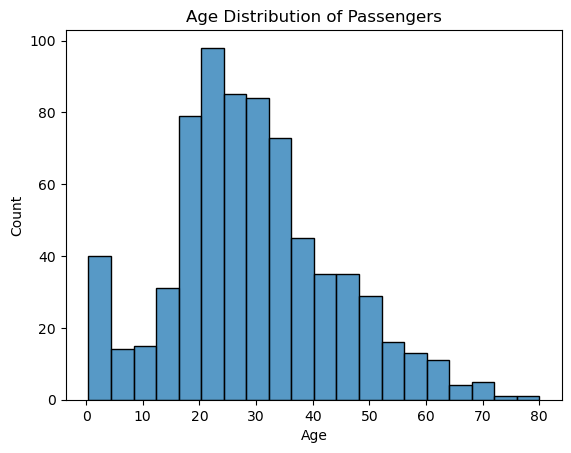

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [27]:
sns.histplot(data=df,x='age',bins=20, kde=False)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

df['age'].value_counts()

# Insights
* The histogram shows how passengers are distributed across different age groups.
* Most passengers fall into a few common age ranges, while very young and very old ages are less frequent.


#  Passenger Class Distribution

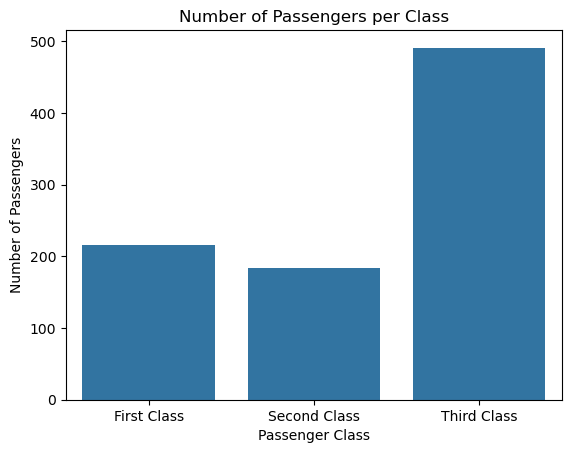

In [14]:
sns.countplot(data=df, x='pclass')
plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers per Class')
plt.show()

# Insights
* The countplot shows the distribution of passengers across First, Second, and Third classes.
* Most passengers belong to the Third Class, followed by Second and First Class.


# Survival vs Gender

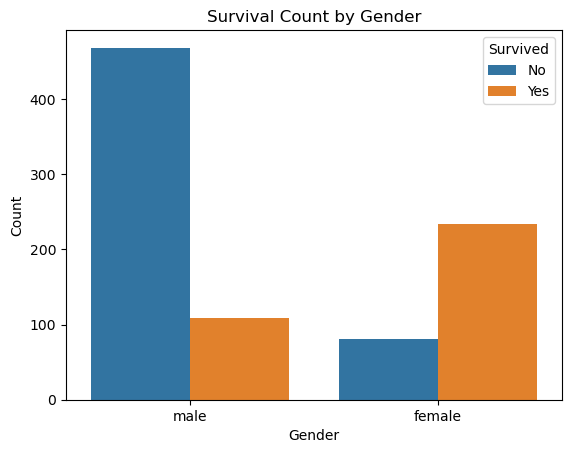

In [15]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# Insights
* The plot shows survival counts for males and females separately.
* Females have a higher survival rate compared to males.

In [16]:
survival_by_gender = df.groupby('sex')['survived'].mean()
survival_by_gender

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

# Insights
* Females had a higher survival probability than males on the Titanic.

#  Survival vs Passenger Class

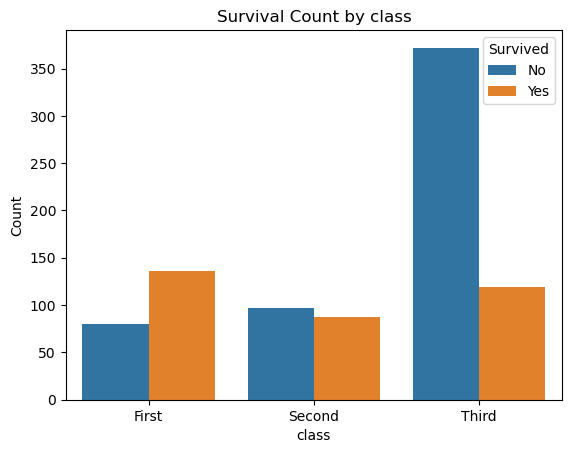

In [17]:
sns.countplot(data=df, x='class', hue='survived')
plt.title('Survival Count by class')
plt.xlabel('class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# Insights
* The plot shows survival distribution across different passenger classes.
* Passengers in First Class have a higher survival rate compared to Second and Third Class.


In [18]:
df.groupby('class')['survived'].mean() * 100


class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64

# Insights
* First Class passengers had the best survival chances.
* Survival rate of First Class was the highest compared to Second and Third Class.

#  Fare Analysis 

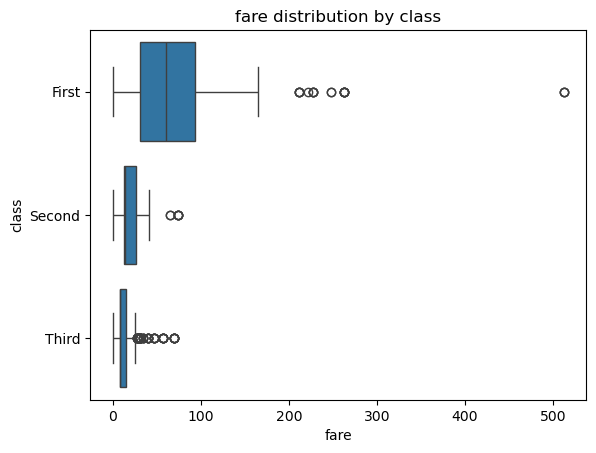

In [19]:
sns.boxplot(data=df, y='class',x='fare')
plt.title('fare distribution by class')
plt.ylabel('class')
plt.xlabel('fare')
plt.show()


# Insights
* The boxplot shows that **First Class passengers paid higher fares** compared to Second and Third Class.
* Fare values vary widely in First Class, while Third Class fares are generally lower and more consistent.


# Comparison

* 1st Class → Highest fare range

* 3rd Class → Lowest fare range

#  GroupBy Analysis – Gender 

In [20]:
df.groupby('sex')['survived'].mean() * 100

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

# Insights
* Females had much higher survival rate than males

## GroupBy Analysis – Class 

In [21]:
df.groupby('class')['survived'].mean() * 100

class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64

# Insights
* Survival rate decreases from 1st → 3rd class.

#  GroupBy Analysis – Age

In [22]:
df.groupby('survived')['age'].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

# Insights
* Survivors were slightly younger than non-survivors on average.

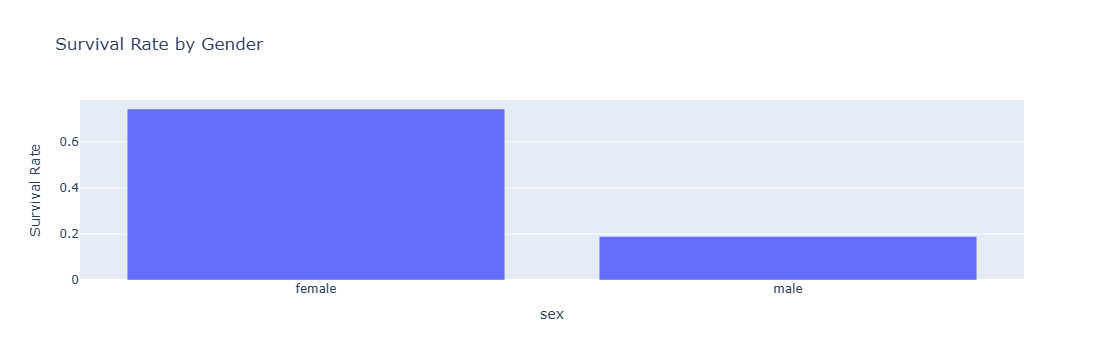

In [30]:
survival_gender = df.groupby('sex')['survived'].mean().reset_index()

fig = px.bar(
    survival_gender,
    x='sex',
    y='survived',
    title='Survival Rate by Gender',
    labels={'survived':'Survival Rate'}
)
fig.show()


# Insights
* The bar chart shows the **average survival rate** for each gender.
* Females have a higher survival rate compared to males.


# Conclusion

### Gender was the most influential factor – females had significantly higher survival chances.
### Passenger class strongly affected survival – 1st class passengers survived more.
### Fare and class are correlated, indicating socio-economic impact on survival.